<a href="https://colab.research.google.com/github/wjdrnqja9/TIL/blob/main/CV/classification_project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import tensorflow as tf

import scikitplot as skplt
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt

import cv2
import numpy as np
import pandas as pd
import PIL
import os

from tensorflow.keras import models, layers, Model
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
from tensorflow.keras.layers import Flatten, Dense, Dropout, ZeroPadding2D

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard, ReduceLROnPlateau
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import EfficientNetB4, EfficientNetB6, ResNet50V2
from keras.applications.vgg16 import VGG16

In [30]:
# batch_size: 한번에 forward & Backword 하는 샘플의 수
batch_size = 32

# Training 수
epochs = 50

# Weight 조절 parameter
LearningRate = 1e-3 # 0.001
Decay = 1e-6

img_width = 224
img_height = 224

In [8]:
CurrentDirectory = '/content/drive/MyDrive/Colab Notebooks/딥러닝/CV_Project'

In [18]:
#os.mkdir(CurrentDirectory+'/MODEL')
#os.mkdir(CurrentDirectory+'/Tensorboard')
train_directory = CurrentDirectory + '/DATASET/Classification/train/'
test_directory  = CurrentDirectory + '/DATASET/Classification/test/'
model_directory = CurrentDirectory + '/MODEL/'
tensorboard_directory = CurrentDirectory + '/Tensorboard/'

In [31]:
# 모델 Return
VGGModel = tf.keras.applications.VGG16(include_top=False, weights='imagenet', input_tensor=None, input_shape=(img_width,img_height,3), pooling=None)
x = GlobalAveragePooling2D()(VGGModel.output)
predictions = Dense(4, activation='softmax')(x)

DeepLearning = Model(inputs=VGGModel.input, outputs=predictions)

# learning parameter를 더하여 최종 model compile
DeepLearning.compile(optimizer=
         SGD(lr=LearningRate, decay=Decay, momentum=0.9, nesterov=True), 
         loss='categorical_crossentropy',
         metrics=['acc']
)

   16384/58889256 [..............................] - ETA: 0s

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


58900480/58889256 [==============================] - 1s 0us/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [32]:
# Online-augmentation 적용 Generator
# 1. 이미지를 전부다 불러서 램 (메모리)에 올릴 수 없기 때문
# 2. 이미지는 Augmentation을 해주는게 좋아서

DATAGEN_TRAIN = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    featurewise_center=True,
    featurewise_std_normalization=True,
    data_format="channels_last",
    validation_split=0.10) # Train / Validation

# Online-augmentation 비적용 Generator (Test용)
DATAGEN_TEST = ImageDataGenerator(
    rescale=1./255,
    featurewise_center=True,
    featurewise_std_normalization=True,
    data_format="channels_last")

In [33]:
# Generator의 instance 생성 (Train)
TRAIN_GENERATOR = DATAGEN_TRAIN.flow_from_directory(
    train_directory,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode= "categorical",
    subset = "training")

VALID_GENERATOR = DATAGEN_TRAIN.flow_from_directory(
    train_directory,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode= "categorical",
    subset = "validation")

# Generator의 instance 생성 (Test)
TEST_GENERATOR = DATAGEN_TEST.flow_from_directory(
    test_directory,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    shuffle = False,
    class_mode= "categorical")

Found 5694 images belonging to 4 classes.
Found 632 images belonging to 4 classes.
Found 771 images belonging to 4 classes.


In [34]:
TEST_GENERATOR.__getitem__(0)[1]

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]], dtype=float32)

In [35]:
# Call-back 함수

# CheckPoint: Epoch 마다 validation 성능을 검증하여, best performance 일 경우 저장
CP = ModelCheckpoint(filepath=model_directory+'VGG19-{epoch:03d}-{val_loss:.4f}-{val_acc:.4f}.hdf5',
            monitor='val_acc', verbose=1, save_best_only=True, mode='max')

# 학습과정 진행사항 확인
TB = TensorBoard(log_dir=tensorboard_directory, write_graph=True, write_images=True)

# Learning Rate 줄여나가기
LR = ReduceLROnPlateau(monitor='val_loss',factor=0.8,patience=3, verbose=1, min_lr=1e-8)

CALLBACK = [CP, TB, LR]

In [36]:
########## Training Start
DeepLearning.fit(
        TRAIN_GENERATOR,
        steps_per_epoch=TRAIN_GENERATOR.n / batch_size,
        
        epochs=15,
        callbacks=CALLBACK,
        shuffle=True, # Training에 패턴이 존재하면 overfit이 잘 되기 때문에, Shuffle 사용해야함. 단 test에는 절대 X
        validation_data=VALID_GENERATOR)
###########

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/15
178/177 [==============================] - ETA: 0s - loss: 0.6263 - acc: 0.7399 
Epoch 1: val_acc improved from -inf to 0.87975, saving model to /content/drive/MyDrive/Colab Notebooks/딥러닝/CV_Project/MODEL/VGG19-001-0.2985-0.8797.hdf5
177/177 [==============================] - 3228s 18s/step - loss: 0.6263 - acc: 0.7399 - val_loss: 0.2985 - val_acc: 0.8797 - lr: 0.0010
Epoch 2/15
178/177 [==============================] - ETA: 0s - loss: 0.3361 - acc: 0.8755
Epoch 2: val_acc did not improve from 0.87975
177/177 [==============================] - 170s 953ms/step - loss: 0.3361 - acc: 0.8755 - val_loss: 0.2808 - val_acc: 0.8718 - lr: 0.0010
Epoch 3/15
178/177 [==============================] - ETA: 0s - loss: 0.1975 - acc: 0.9262
Epoch 3: val_acc improved from 0.87975 to 0.93513, saving model to /content/drive/MyDrive/Colab Notebooks/딥러닝/CV_Project/MODEL/VGG19-003-0.1730-0.9351.hdf5
177/177 [==============================] - 168s 944ms/step - loss: 0.1975 - acc: 0.926

In [37]:
DeepLearning.evaluate(VALID_GENERATOR)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


20/20 [==============================] - 15s 747ms/step - loss: 0.1769 - acc: 0.9288


[0.17685793340206146, 0.9287974834442139]

In [38]:
DeepLearning.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [39]:
# Prediction
TEST_Prediction = DeepLearning.predict_generator(TEST_GENERATOR, verbose=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


25/25 [==============================] - 499s 21s/step


In [40]:
# data frame으로 변환
Result = pd.DataFrame(TEST_Prediction)

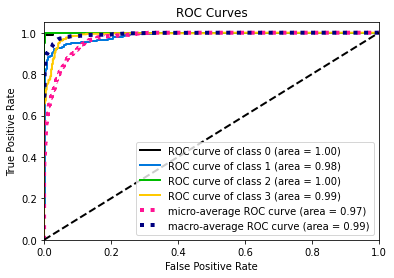

In [41]:
skplt.metrics.plot_roc(TEST_GENERATOR.classes.tolist(), Result)

In [42]:
import PIL

def grad_cam(model, img, layer_name="block5_conv3", label_name=None, category_id=None):
    img_tensor = np.expand_dims(img, axis=0)
    conv_layer = model.get_layer(layer_name)
    heatmap_model = tf.keras.Model(inputs=[model.inputs], outputs=[conv_layer.output, model.output])

    with tf.GradientTape() as gtape:
        conv_output, predictions = heatmap_model(img_tensor)
        if category_id == None:
            category_id = np.argmax(predictions[0])
        if label_name:
            print(label_name[category_id])
        output = predictions[:, category_id]
        grads = gtape.gradient(output, conv_output)
        pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    heatmap = tf.reduce_mean(tf.multiply(pooled_grads, conv_output), axis=-1)
    heatmap = np.maximum(heatmap, 0)
    max_heat = np.max(heatmap)
    if max_heat == 0:
        max_heat = 1e-10
    heatmap /= max_heat
    return np.squeeze(heatmap), predictions

def grad_camAll(model, img, layer_name="conv4_block6_out", blockSize=7, label_name=None, category_id=None):
    img_tensor = np.expand_dims(img, axis=0)
    conv_layer = model.get_layer(layer_name)
    heatmap_model = Model([model.inputs], [conv_layer.output, model.output])

    with tf.GradientTape() as gtape:
        conv_output, predictions = heatmap_model(img_tensor)
        if category_id == None:
            category_id = np.argmax(predictions[0])
        if label_name:
            print(label_name[category_id])
        output = predictions[:, category_id]
        grads = gtape.gradient(output, conv_output)
        pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    
    res = sp.ndimage.zoom(conv_output[0], (224/blockSize, 224/blockSize, 1), order=2)   
    heatmap = tf.reduce_mean(tf.multiply(pooled_grads, res), axis=-1)
    heatmap = np.maximum(heatmap, 0)
    max_heat = np.max(heatmap)
    if max_heat == 0:
        max_heat = 1e-10
    heatmap /= max_heat
    return np.squeeze(heatmap)

def show_imgwithheat(img_path, heatmap, alpha=0.4, return_array=False):
    img = cv2.imread(img_path)
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = (heatmap*255).astype("uint8")
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = heatmap * alpha + img
    superimposed_img = np.clip(superimposed_img, 0, 255).astype("uint8")
    superimposed_img = cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB)

    imgwithheat = PIL.Image.fromarray(superimposed_img)  
    display(imgwithheat)

    if return_array:
        return superimposed_img

In [43]:
# CAM Generator
CAM_GENERATOR = DATAGEN_TEST.flow_from_directory(
    test_directory,
    target_size = (img_width, img_height),
    batch_size = 1,
    shuffle = False,
    class_mode='binary')

Found 771 images belonging to 4 classes.


In [44]:
DeepLearning.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


IndexError: ignored

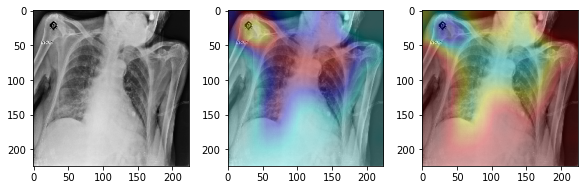

In [45]:
for Iterator in range(0, 20):
    Image, Label = CAM_GENERATOR.next()
    Image = Image[0]
    FileName = CAM_GENERATOR.filenames[Iterator]
    # Final Layer
    HEATMAP1, pred1 = grad_cam(model = DeepLearning, img = Image, layer_name = 'block5_conv3', category_id=0)
    
    heatmap1 = cv2.resize(HEATMAP1, (Image.shape[1], Image.shape[0]))
    heatmap1 = (heatmap1*255).astype("uint8")
    heatmap1 = cv2.applyColorMap(heatmap1, cv2.COLORMAP_JET)

    fig, ax = plt.subplots( nrows=3, ncols=1 )  # create figure & 1 axis
    fig.set_size_inches(9.0, 3.0)
    ax = plt.subplot(1,3,1)
    ax.imshow(Image)
    ax = plt.subplot(1,3,2)
    ax.imshow(Image)
    ax.imshow(255-heatmap1, cmap=plt.cm.jet, alpha=0.3, interpolation='nearest' )
    ax = plt.subplot(1,3,3)
    ax.imshow(Image)
    ax.imshow(heatmap1, cmap=plt.cm.jet, alpha=0.3, interpolation='nearest' )

    plt.subplots_adjust(left = 0.06, wspace = 0.25, hspace = 0.1, bottom = 0.025, top = 0.975)
    pred=round(pred1.numpy()[0][0],3)
    HeatImage = "HEATMAP/0420_"+CAM_GENERATOR.filenames[Iterator].split('\\')[1] + "^" + str(round(pred, 4)) + ".jpg"
    plt.savefig(HeatImage.strip(), bbox_inches = 'tight')
    plt.close()
    plt.cla()
    plt.clf()

In [ ]:
MODEL = DeepLearning

In [ ]:
for Iterator in range(0, 5):
    Image, Label = CAM_GENERATOR.next()
    Image = Image[0]
    FileName = CAM_GENERATOR.filenames[Iterator]

    LayerNames = ['block1_conv2', 'block2_conv2', 'block3_conv3', 'block4_conv3', 'block5_conv3']
    Heatmaps = []
    for LayerIDX in range(0, len(LayerNames)):
        HEATMAP1, pred1 = grad_cam(model = MODEL, img = Image, layer_name = LayerNames[LayerIDX], category_id=0)
        heatmap1 = cv2.resize(HEATMAP1, (img_width, img_height))
        heatmap1 = (heatmap1*255).astype("uint8")
        heatmap1 = cv2.applyColorMap(heatmap1, cv2.COLORMAP_JET)
        Heatmaps.append(heatmap1)


    fig, ax = plt.subplots( nrows=3, ncols=2 )  # create figure & 1 axis
    fig.set_size_inches(9.0, 3.0)
    ax = plt.subplot(2,3,1)
    ax.imshow(Image)
    ax = plt.subplot(2,3,2)
    ax.imshow(Image)
    ax.imshow(255-Heatmaps[0], cmap=plt.cm.jet, alpha=0.3, interpolation='nearest' )
    ax = plt.subplot(2,3,3)
    ax.imshow(Image)
    ax.imshow(255-Heatmaps[1], cmap=plt.cm.jet, alpha=0.3, interpolation='nearest' )

    ax = plt.subplot(2,3,4)
    ax.imshow(Image)
    ax.imshow(255-Heatmaps[2], cmap=plt.cm.jet, alpha=0.3, interpolation='nearest' )
    ax = plt.subplot(2,3,5)
    ax.imshow(Image)
    ax.imshow(255-Heatmaps[3], cmap=plt.cm.jet, alpha=0.3, interpolation='nearest' )
    ax = plt.subplot(2,3,6)
    ax.imshow(Image)
    ax.imshow(255-Heatmaps[4], cmap=plt.cm.jet, alpha=0.3, interpolation='nearest' )


    plt.subplots_adjust(left = 0.06, wspace = -0.58, hspace = 0.3, bottom = 0.025, top = 0.975)
    pred=round(pred1.numpy()[0][0],3)
    HeatImage = "HEATMAP_5/" + CAM_GENERATOR.filenames[Iterator].split('\\')[1] + "^" + str(round(pred, 4)) + ".jpg"
    plt.savefig(HeatImage.strip(), bbox_inches = 'tight')
    plt.close()
    plt.cla()
    plt.clf()
    del Image

In [ ]:
Image, Label = TEST_GENERATOR.__getitem__(3)
Image = Image[0]
FileName = TEST_GENERATOR.filenames[0]

LayerName = "block4_conv3"
Heatmaps = []
for CategoryIDX in range(0, 3):
    HEATMAP1, pred1 = grad_cam(model = VGGModel, img = Image, layer_name = LayerName, category_id=CategoryIDX)
    heatmap_resize = cv2.resize(HEATMAP1, (img_width, img_height))
    heatmap_resize_255 = (heatmap_resize*255).astype("uint8")
    heatmap1 = cv2.applyColorMap(255-heatmap_resize_255, cv2.COLORMAP_JET ) / 255
    heatmap1[:, :, 2] -= .5
    heatmap1[(heatmap1[:, :, 2] < 0), 2] = 0
    Heatmaps.append(heatmap1)

fig, ax = plt.subplots( nrows=2, ncols=2 )  # create figure & 1 axis
fig.set_size_inches(6.0, 6.0)
ax = plt.subplot(2,2,1)
ax.imshow(Image)
ax.title.set_text('Origin Fig')

ax = plt.subplot(2,2,2)
ax.imshow(Image)
ax.imshow(Heatmaps[0], cmap=plt.cm.jet, alpha=0.3, interpolation='nearest' )
ax.title.set_text('Benign')

ax = plt.subplot(2,2,3)
ax.imshow(Image)
ax.imshow(Heatmaps[1], cmap=plt.cm.jet, alpha=0.3, interpolation='nearest' )
ax.title.set_text('Cancer')

ax = plt.subplot(2,2,4)
ax.imshow(Image)
ax.imshow(Heatmaps[2], cmap=plt.cm.jet, alpha=0.3, interpolation='nearest' )
ax.title.set_text('Cancer ENE+')

plt.subplots_adjust(wspace = 0.15, hspace = 0.3, bottom = 0.15, top = 0.85)

In [ ]:
Res = VGGModel.predict(TEST_GENERATOR)

In [ ]:
skplt.metrics.plot_roc_curve(TEST_GENERATOR.classes, Res)